In [1]:
from google.colab import files
uploaded = files.upload()

Saving SAB.csv to SAB.csv


In [2]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import column_or_1d

from keras.models import Sequential
from keras.layers import Dense, GRU

In [3]:
df = pd.read_csv('SAB.csv')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,3/1/2019,"242,000","236,300","246,000","236,300",31.25K,0.83%
1,3/4/2019,"242,000","240,000","245,500","239,000",44.09K,0.00%
2,3/5/2019,"243,500","244,500","244,800","240,100",10.22K,0.62%
3,3/6/2019,"243,900","240,400","245,000","240,000",22.91K,0.16%
4,3/7/2019,"241,100","242,000","242,900","240,500",25.34K,-1.15%
...,...,...,...,...,...,...,...
1310,5/29/2024,"60,500","61,000","61,300","60,300",1.47M,-0.82%
1311,5/30/2024,"59,300","59,600","60,000","58,300",1.67M,-1.98%
1312,5/31/2024,"58,300","59,300","59,300","58,300",1.49M,-1.69%
1313,6/3/2024,"59,400","59,000","60,100","58,700",1.13M,1.89%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1315 non-null   object
 1   Price     1315 non-null   object
 2   Open      1315 non-null   object
 3   High      1315 non-null   object
 4   Low       1315 non-null   object
 5   Vol.      1315 non-null   object
 6   Change %  1315 non-null   object
dtypes: object(7)
memory usage: 72.0+ KB


<h1> Tien xu ly du lieu

In [5]:
df = df.dropna() # Drop missing values
df['Date'] = pd.to_datetime(df['Date'])
df["Price"] = df["Price"].str.replace(',', '').astype(float)

In [6]:
df1 = df.reset_index()['Price']

In [7]:
df['Index'] = np.arange(len(df.index))

<h1> Scale du lieu

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

<h1>Split the data into training, testing arcording to 7:3

In [9]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

In [10]:
train_data = df1[:train_size]
test_data = df1[train_size:]

<h1> Create dataset

In [11]:
#Chuyển mảng giá trị của dataset thành ma trận
def create_dataset(dataset, time_step = 1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   #i=0, X=0,1,2,3...99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [13]:
import numpy
#Reshape into X=t,t+1, t+2... t+99 and Y= t+100
time_step =100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [15]:
#Define GRU model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
#Fit the model
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 5s 48ms/step - loss: 0.2907
Epoch 2/100
13/13 [==============================] - 1s 49ms/step - loss: 0.0308
Epoch 3/100
13/13 [==============================] - 1s 49ms/step - loss: 0.0199
Epoch 4/100
13/13 [==============================] - 1s 65ms/step - loss: 0.0111
Epoch 5/100
13/13 [==============================] - 1s 90ms/step - loss: 0.0087
Epoch 6/100
13/13 [==============================] - 1s 91ms/step - loss: 0.0062
Epoch 7/100
13/13 [==============================] - 1s 70ms/step - loss: 0.0043
Epoch 8/100
13/13 [==============================] - 1s 47ms/step - loss: 0.0027
Epoch 9/100
13/13 [==============================] - 1s 51ms/step - loss: 0.0017
Epoch 10/100
13/13 [==============================] - 1s 49ms/step - loss: 0.0012
Epoch 11/100
13/13 [==============================] - 1s 49ms/step - loss: 0.0010
Epoch 12/100
13/13 [==============================] - 1s 50ms/step - loss: 9.5376e-04
Epoch 13/100
13/13 [=

<h1> Du bao du lieu test

In [17]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 12ms/step


In [18]:
#Chuan hoa du lieu cua y_pred
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)

In [19]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
ytest

array([[89661.],
       [89467.],
       [89322.],
       [87533.],
       [86082.],
       [85357.],
       [85550.],
       [85598.],
       [85405.],
       [84631.],
       [82697.],
       [81971.],
       [80762.],
       [79311.],
       [80182.],
       [82407.],
       [82455.],
       [82455.],
       [82745.],
       [82697.],
       [82697.],
       [84148.],
       [83180.],
       [80569.],
       [80037.],
       [80520.],
       [79843.],
       [79892.],
       [79553.],
       [79263.],
       [79360.],
       [78828.],
       [78586.],
       [78489.],
       [77716.],
       [77716.],
       [76893.],
       [76652.],
       [76410.],
       [75201.],
       [75104.],
       [75443.],
       [76410.],
       [76507.],
       [76410.],
       [77087.],
       [77377.],
       [77280.],
       [77280.],
       [77134.],
       [79087.],
       [78989.],
       [79087.],
       [77622.],
       [75669.],
       [76548.],
       [75816.],
       [75669.],
       [75572.

<h1>
Evaluate the accuracy of the algorithm

In [20]:
#Tính RMSE, MAE, MAPE

test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(ytest, y_pred)
print('Testing MAE:', test_mae)

#MAPE
test_mape = np.mean(np.abs((ytest - y_pred) / ytest))*100
print('Testing MAPE:', test_mape)

Testing RMSE: 1658.0308026583537
Testing MAE: 1299.636851615646
Testing MAPE: 1.9819408643623753


<h1>Du doan co phieu trong 30, 60, 90 ngay tiep theo

In [21]:
x_input=test_data[-time_step:].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.03567668]
101
1 day input [0.0397463  0.04059197 0.0384778  0.03509514 0.03763214 0.03636364
 0.03340381 0.03340381 0.03340381 0.03382664 0.03763214 0.03551797
 0.03298097 0.03298097 0.02663848 0.02029598 0.02283298 0.01987315
 0.01606765 0.02114165 0.01902748 0.01902748 0.02029598 0.02241015
 0.02494715 0.02325581 0.02283298 0.02579281 0.02367865 0.02325581
 0.01902748 0.01733615 0.01606765 0.02198732 0.02536998 0.02579281
 0.02452431 0.02706131 0.0372093  0.03424947 0.03171247 0.02875264
 0.02790698 0.03002114 0.02621564 0.02325581 0.01775899 0.01860465
 0.01860465 0.01987315 0.02029598 0.01902748 0.01860465 0.02114165
 0.01987315 0.01775899 0.01818182 0.01649049 0.01479915 0.01691332
 0.01522199 0.01183932 0.01057082 0.01183932 0.01226216 0.01479915
 0.01057082 0.00972516 0.00634249 0.         0.00295983 0.00211416
 0.00465116 0.00803383 0.00803383 0.01733615 0.01775899 0.01902748
 0.02198732 0.02706131 0.02156448 0.02156448 0.01860465 0.01945032
 0.02156448 0.02114165 0.02367865

In [22]:
print(scaler.inverse_transform(lst_output))

[[60937.5349395 ]
 [61458.77764001]
 [61932.9415597 ]
 [62390.48306458]
 [62839.65917863]
 [63282.32975863]
 [63718.91858056]
 [64149.57453869]
 [64574.40247573]
 [64993.50018613]
 [65406.96634538]
 [65814.88553248]
 [66217.35642292]
 [66614.46976289]
 [67006.30484521]
 [67392.95417815]
 [67774.49705452]
 [68151.01805329]
 [68522.5911811 ]
 [68889.30454105]
 [69251.22509152]
 [69608.43388736]
 [69961.00141108]
 [70308.99462104]
 [70652.4945721 ]
 [70991.56469852]
 [71326.26843452]
 [71656.67978674]
 [71982.85866529]
 [72304.87202853]
 [72622.78331071]
 [72936.6453737 ]
 [73246.52869999]
 [73552.48967558]
 [73854.59173471]
 [74152.88069099]
 [74447.4235028 ]
 [74738.26598376]
 [75025.47156811]
 [75309.08606946]
 [75589.16587383]
 [75865.75327069]
 [76138.91521841]
 [76408.6940065 ]
 [76675.13544858]
 [76938.28535825]
 [77198.20012152]
 [77454.91145551]
 [77708.47927034]
 [77958.9458555 ]
 [78206.34292811]
 [78450.73392242]
 [78692.1435073 ]
 [78930.6210205 ]
 [79166.20170325]
 [79398.93

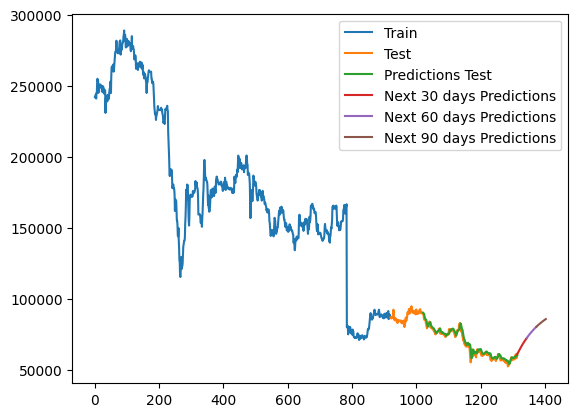

In [23]:
#Ve hinh
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size + time_step + 1 , stop=len(df1), step=1)
plt.plot(test_data_index, y_pred)

next_30_days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 29, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1) + 29, stop=len(df1) + 59, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1) + 59, stop=len(df1) + 89, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train', 'Test', 'Predictions Test', 'Next 30 days Predictions', 'Next 60 days Predictions', 'Next 90 days Predictions'])
plt.show()

<h1># Split the data into training, testing arcording to 8:2

In [24]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

In [25]:
train_data = df1[:train_size]
test_data = df1[train_size:]

<h1>Create dataset

In [26]:
#Chuyển mảng giá trị của dataset thành ma trận
def create_dataset(dataset, time_step = 1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   #i=0, X=0,1,2,3...99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [27]:
import numpy
#Reshape into X=t,t+1, t+2... t+99 and Y= t+100
time_step =100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [28]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [29]:
#Define GRU model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
#Fit the model
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 3s 51ms/step - loss: 0.0897
Epoch 2/100
15/15 [==============================] - 1s 51ms/step - loss: 0.0137
Epoch 3/100
15/15 [==============================] - 1s 49ms/step - loss: 0.0072
Epoch 4/100
15/15 [==============================] - 1s 87ms/step - loss: 0.0039
Epoch 5/100
15/15 [==============================] - 1s 83ms/step - loss: 0.0020
Epoch 6/100
15/15 [==============================] - 1s 87ms/step - loss: 9.8573e-04
Epoch 7/100
15/15 [==============================] - 1s 60ms/step - loss: 6.8979e-04
Epoch 8/100
15/15 [==============================] - 1s 52ms/step - loss: 6.6153e-04
Epoch 9/100
15/15 [==============================] - 1s 51ms/step - loss: 6.4488e-04
Epoch 10/100
15/15 [==============================] - 1s 50ms/step - loss: 6.2917e-04
Epoch 11/100
15/15 [==============================] - 1s 54ms/step - loss: 6.2127e-04
Epoch 12/100
15/15 [==============================] - 1s 52ms/step - loss: 6.0674e-

<h1> Du bao du lieu test

In [31]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)

6/6 [==============================] - 0s 11ms/step


In [32]:
#Chuan hoa du lieu cua y_pred
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)

In [33]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
ytest

array([[67956.],
       [67175.],
       [67175.],
       [66394.],
       [67272.],
       [68444.],
       [69225.],
       [68249.],
       [66687.],
       [66687.],
       [68346.],
       [66198.],
       [67468.],
       [67565.],
       [64636.],
       [61609.],
       [59364.],
       [55361.],
       [56044.],
       [59950.],
       [62391.],
       [64636.],
       [63562.],
       [63562.],
       [62391.],
       [60926.],
       [59852.],
       [60535.],
       [61707.],
       [62683.],
       [62195.],
       [61512.],
       [61609.],
       [62000.],
       [58973.],
       [61512.],
       [62781.],
       [63367.],
       [64636.],
       [63465.],
       [63465.],
       [63172.],
       [62488.],
       [63660.],
       [64050.],
       [64050.],
       [63953.],
       [63465.],
       [62488.],
       [61512.],
       [61317.],
       [60047.],
       [60731.],
       [60535.],
       [60535.],
       [60047.],
       [60535.],
       [61219.],
       [60633.

<h1>Evaluate the accuracy of the algorithm

In [34]:
#Tính RMSE, MAE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(ytest, y_pred)
print('Testing MAE:', test_mae)

#MAPE
test_mape = np.mean(np.abs((ytest - y_pred) / ytest))*100
print('Testing MAPE:', test_mape)

Testing RMSE: 1397.822934395912
Testing MAE: 1025.795862268519
Testing MAPE: 1.719264894526189


<h1>Du doan co phieu trong 30, 60, 90 ngay tiep theo




In [35]:
x_input=test_data[-time_step:].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.03508145]
101
1 day input [0.0397463  0.04059197 0.0384778  0.03509514 0.03763214 0.03636364
 0.03340381 0.03340381 0.03340381 0.03382664 0.03763214 0.03551797
 0.03298097 0.03298097 0.02663848 0.02029598 0.02283298 0.01987315
 0.01606765 0.02114165 0.01902748 0.01902748 0.02029598 0.02241015
 0.02494715 0.02325581 0.02283298 0.02579281 0.02367865 0.02325581
 0.01902748 0.01733615 0.01606765 0.02198732 0.02536998 0.02579281
 0.02452431 0.02706131 0.0372093  0.03424947 0.03171247 0.02875264
 0.02790698 0.03002114 0.02621564 0.02325581 0.01775899 0.01860465
 0.01860465 0.01987315 0.02029598 0.01902748 0.01860465 0.02114165
 0.01987315 0.01775899 0.01818182 0.01649049 0.01479915 0.01691332
 0.01522199 0.01183932 0.01057082 0.01183932 0.01226216 0.01479915
 0.01057082 0.00972516 0.00634249 0.         0.00295983 0.00211416
 0.00465116 0.00803383 0.00803383 0.01733615 0.01775899 0.01902748
 0.02198732 0.02706131 0.02156448 0.02156448 0.01860465 0.01945032
 0.02156448 0.02114165 0.02367865

In [36]:
print(scaler.inverse_transform(lst_output))

[[60796.7620194 ]
 [61160.41203402]
 [61486.88341491]
 [61797.03105055]
 [62099.01681356]
 [62396.29875124]
 [62690.40809572]
 [62982.05319606]
 [63271.58294059]
 [63559.16296318]
 [63844.89458241]
 [64128.81920673]
 [64410.98881699]
 [64691.41750969]
 [64970.13876401]
 [65247.16491438]
 [65522.51358144]
 [65796.20590992]
 [66068.25071014]
 [66338.67265098]
 [66607.48406686]
 [66874.69464913]
 [67140.32818563]
 [67404.3970108 ]
 [67666.91257805]
 [67927.88986489]
 [68187.3447299 ]
 [68445.29303163]
 [68701.74710453]
 [68956.71752095]
 [69210.22542566]
 [69462.27434278]
 [69712.88541704]
 [69962.06393465]
 [70209.83632654]
 [70456.20611683]
 [70701.18211582]
 [70944.78723034]
 [71187.02674657]
 [71427.91123688]
 [71667.4583219 ]
 [71905.68386018]
 [72142.57904142]
 [72378.17558274]
 [72612.48053238]
 [72845.50270066]
 [73077.25442201]
 [73307.751555  ]
 [73537.00114787]
 [73765.00496268]
 [73991.78766832]
 [74217.34926477]
 [74441.71265885]
 [74664.87080231]
 [74886.85365021]
 [75107.66

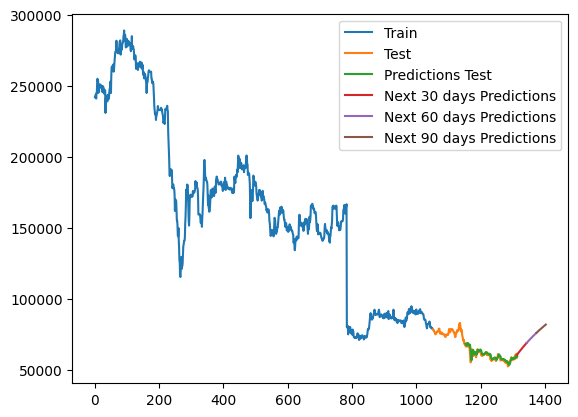

In [37]:
#Ve hinh
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size + time_step + 1 , stop=len(df1), step=1)
plt.plot(test_data_index, y_pred)

next_30_days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 29, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1) + 29, stop=len(df1) + 59, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1) + 59, stop=len(df1) + 89, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train', 'Test', 'Predictions Test', 'Next 30 days Predictions', 'Next 60 days Predictions', 'Next 90 days Predictions'])
plt.show()

<h1># Split the data into training, testing arcording to 9:1

In [39]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size

In [40]:
train_data = df1[:train_size]
test_data = df1[train_size:]

<h1> Create dataset

In [41]:
#Chuyển mảng giá trị của dataset thành ma trận
def create_dataset(dataset, time_step = 1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   #i=0, X=0,1,2,3...99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [42]:
import numpy
#Reshape into X=t,t+1, t+2... t+99 and Y= t+100
time_step =100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [43]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [44]:
#Define GRU model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [45]:
#Fit the model
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 5s 85ms/step - loss: 0.0805
Epoch 2/100
17/17 [==============================] - 1s 58ms/step - loss: 0.0147
Epoch 3/100
17/17 [==============================] - 1s 52ms/step - loss: 0.0059
Epoch 4/100
17/17 [==============================] - 1s 50ms/step - loss: 0.0020
Epoch 5/100
17/17 [==============================] - 1s 50ms/step - loss: 8.5045e-04
Epoch 6/100
17/17 [==============================] - 1s 52ms/step - loss: 7.2770e-04
Epoch 7/100
17/17 [==============================] - 1s 51ms/step - loss: 6.9855e-04
Epoch 8/100
17/17 [==============================] - 1s 54ms/step - loss: 6.7435e-04
Epoch 9/100
17/17 [==============================] - 1s 52ms/step - loss: 6.5745e-04
Epoch 10/100
17/17 [==============================] - 1s 53ms/step - loss: 6.3949e-04
Epoch 11/100
17/17 [==============================] - 1s 50ms/step - loss: 6.2280e-04
Epoch 12/100
17/17 [==============================] - 1s 51ms/step - loss: 6.12

<h1>Du bao du lieu test

In [46]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 31ms/step


In [47]:
#Chuan hoa du lieu cua y_pred
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)

In [48]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
ytest

array([[54800.],
       [54000.],
       [52500.],
       [53200.],
       [53000.],
       [53600.],
       [54400.],
       [54400.],
       [56600.],
       [56700.],
       [57000.],
       [57700.],
       [58900.],
       [57600.],
       [57600.],
       [56900.],
       [57100.],
       [57600.],
       [57500.],
       [58100.],
       [57800.],
       [58000.],
       [57500.],
       [59500.],
       [58000.],
       [58500.],
       [61000.],
       [60500.],
       [59300.],
       [58300.],
       [59400.]])

<h1>Evaluate the accuracy of the algorithm

In [49]:
#Tính RMSE, MAE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(ytest, y_pred)
print('Testing MAE:', test_mae)

#MAPE
test_mape = np.mean(np.abs((ytest - y_pred) / ytest))*100
print('Testing MAPE:', test_mape)

Testing RMSE: 1053.2899815569758
Testing MAE: 829.6959425403223
Testing MAPE: 1.4543966545448161


<h1>Du doan co phieu trong 30, 60, 90 ngay tiep theo

In [50]:
x_input=test_data[-time_step:].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.03298831]
101
1 day input [0.0397463  0.04059197 0.0384778  0.03509514 0.03763214 0.03636364
 0.03340381 0.03340381 0.03340381 0.03382664 0.03763214 0.03551797
 0.03298097 0.03298097 0.02663848 0.02029598 0.02283298 0.01987315
 0.01606765 0.02114165 0.01902748 0.01902748 0.02029598 0.02241015
 0.02494715 0.02325581 0.02283298 0.02579281 0.02367865 0.02325581
 0.01902748 0.01733615 0.01606765 0.02198732 0.02536998 0.02579281
 0.02452431 0.02706131 0.0372093  0.03424947 0.03171247 0.02875264
 0.02790698 0.03002114 0.02621564 0.02325581 0.01775899 0.01860465
 0.01860465 0.01987315 0.02029598 0.01902748 0.01860465 0.02114165
 0.01987315 0.01775899 0.01818182 0.01649049 0.01479915 0.01691332
 0.01522199 0.01183932 0.01057082 0.01183932 0.01226216 0.01479915
 0.01057082 0.00972516 0.00634249 0.         0.00295983 0.00211416
 0.00465116 0.00803383 0.00803383 0.01733615 0.01775899 0.01902748
 0.02198732 0.02706131 0.02156448 0.02156448 0.01860465 0.01945032
 0.02156448 0.02114165 0.02367865

In [51]:
print(scaler.inverse_transform(lst_output))

[[60301.73440091]
 [60475.10106862]
 [60546.08046263]
 [60591.27559885]
 [60629.00575809]
 [60663.5536328 ]
 [60696.31037116]
 [60727.96317749]
 [60758.8917762 ]
 [60789.30673376]
 [60819.33579966]
 [60849.04857539]
 [60878.48735042]
 [60907.68031776]
 [60936.64069287]
 [60965.38609639]
 [60993.92181449]
 [61022.25137129]
 [61050.38093403]
 [61078.32107507]
 [61106.06386513]
 [61133.6119473 ]
 [61160.97589396]
 [61188.15041892]
 [61215.1416894 ]
 [61241.94441922]
 [61268.56653765]
 [61295.00628263]
 [61321.26277313]
 [61347.3404143 ]
 [61373.23920615]
 [61398.9626728 ]
 [61424.50905219]
 [61449.88098741]
 [61475.07935949]
 [61500.10593049]
 [61524.9571763 ]
 [61549.64278825]
 [61574.15748015]
 [61598.50477614]
 [61622.68555723]
 [61646.69718035]
 [61670.54493167]
 [61694.23233531]
 [61717.75586717]
 [61741.11993238]
 [61764.32188787]
 [61787.3670198 ]
 [61810.25356613]
 [61832.98328891]
 [61855.55883124]
 [61877.97843106]
 [61900.24561249]
 [61922.36037552]
 [61944.32272017]
 [61966.13

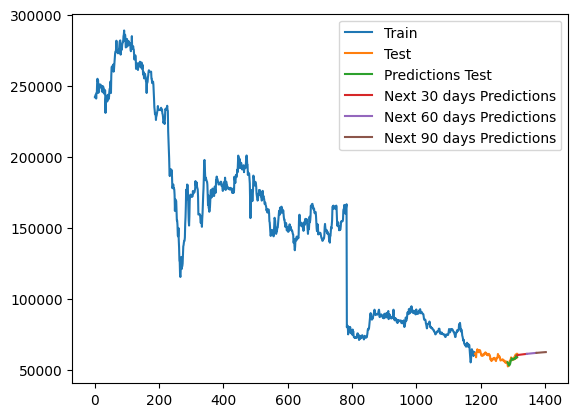

In [52]:
#Ve hinh
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size + time_step + 1 , stop=len(df1), step=1)
plt.plot(test_data_index, y_pred)

next_30_days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 29, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1) + 29, stop=len(df1) + 59, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1) + 59, stop=len(df1) + 89, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train', 'Test', 'Predictions Test', 'Next 30 days Predictions', 'Next 60 days Predictions', 'Next 90 days Predictions'])
plt.show()